https://discuss.codecademy.com/t/roller-coaster-challenge-project-python-pandas/462378

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

# load rankings data here:

gtaw_wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
gtaw_steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
print(gtaw_wood.head(), gtaw_steel.head())

#do some quick data cleaning and rename a couple repeated names
gtaw_wood.loc[gtaw_wood.Name == "Voyage", "Name"] = "The Voyage"
gtaw_wood.loc[gtaw_wood.Name == 'Beast', 'Name'] = 'The Beast'
gtaw_wood.loc[gtaw_wood.Name == 'The Raven', 'Name'] = 'Raven'
gtaw_wood.loc[(gtaw_wood.Name == 'El Toro') & (gtaw_wood.Park == 'Freitzeitpark Plohn'), 'Name'] = 'El Toro Deutsch'
gtaw_steel.loc[gtaw_steel.Name == 'Superman The Ride', 'Name'] = 'Superman: The Ride'
gtaw_steel.loc[(gtaw_steel.Name == 'Bizarro') & (gtaw_steel.Park == 'Six Flags New England'), 'Name'] = 'Bizarro (Six Flags NE)'
#check out my fav!
cedar_point = pd.concat([gtaw_steel[gtaw_steel.Park == 'Cedar Point'],gtaw_wood[gtaw_wood.Park == 'Cedar Point']], axis=0, ignore_index=True)
cedar_point_wood = gtaw_wood[gtaw_wood.Park == 'Cedar Point']
print('Cedar Point Rankings')
print(cedar_point)

#Basic info
print('Number of ranked wooden coasters:', gtaw_wood.Name.nunique())
print('Number of ranked steel coasters:', gtaw_steel.Name.nunique())
print('Number of wooden suppliers:', gtaw_wood.Supplier.nunique())
print('Number of steel suppliers:', gtaw_steel.Supplier.nunique())
print('Total ranked coasters:')

#learn that rankings expand from top 10 to top 50 IMPORTANT FOR GRAPHING FUNCTIONS!
print(gtaw_wood.groupby('Year of Rank')['Name'].count())


   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013      Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, 

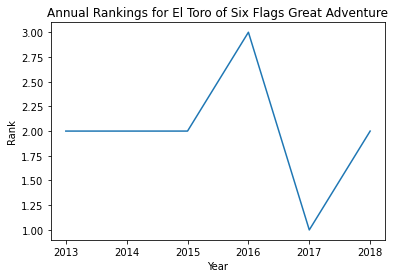

None


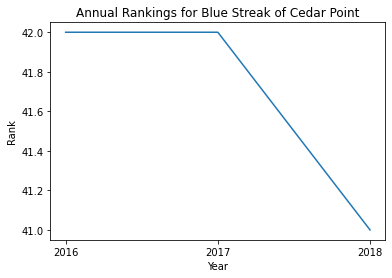

None


<Figure size 432x288 with 0 Axes>

In [2]:
# write function to plot rankings over time for 1 roller coaster here:
##park name is technically now an unnecessary parameter after renaming German 'El Toro'

def coaster_rank(name, park_name, material):
    if material =='steel':
        ranks = gtaw_steel[(gtaw_steel.Name == name) & (gtaw_steel.Park == park_name)]
    else:
        ranks = gtaw_wood[(gtaw_wood.Name == name) & (gtaw_wood.Park == park_name)]
    plt.plot(range(len(ranks['Year of Rank'])), ranks.Rank)
    ax = plt.subplot()
    
    #later, I will stop usings set_xticks() in order to make sure I can compare coasters with different years of rankings
    ax.set_xticks(range(len(ranks['Year of Rank'])))
    ax.set_xticklabels(ranks['Year of Rank'])
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title('Annual Rankings for {} of {}'.format(name, park_name))
    plt.show()
    plt.clf()
print(coaster_rank('El Toro', 'Six Flags Great Adventure', 'wood'))
print(coaster_rank('Blue Streak', 'Cedar Point', 'wood'))


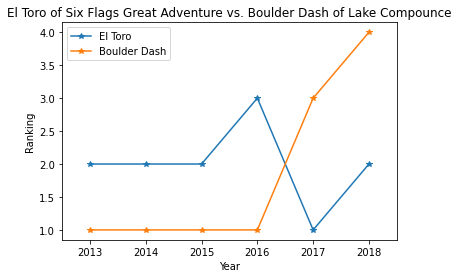

     Rank          Name            Park        Location         Supplier  \
0       1  Boulder Dash  Lake Compounce  Bristol, Conn.              CCI   
10      1  Boulder Dash  Lake Compounce  Bristol, Conn.              CCI   
20      1  Boulder Dash  Lake Compounce  Bristol, Conn.              CCI   
30      1  Boulder Dash  Lake Compounce  Bristol, Conn.  Custom Coasters   
82      3  Boulder Dash  Lake Compounce  Bristol, Conn.  Custom Coasters   
133     4  Boulder Dash  Lake Compounce  Bristol, Conn.  Custom Coasters   

     Year Built  Points  Year of Rank  
0          2000    1333          2013  
10         2000    1480          2014  
20         2000    1625          2015  
30         2000    1216          2016  
82         2000    1171          2017  
133        2000     982          2018  


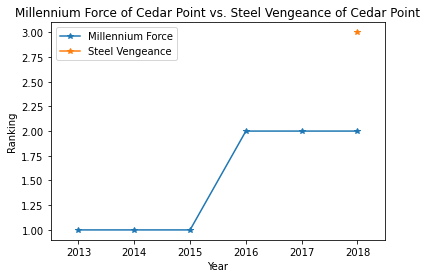

     Rank             Name         Park        Location        Supplier  \
132     3  Steel Vengeance  Cedar Point  Sandusky, Ohio  Rocky Mountain   

     Year Built  Points  Year of Rank  
132        2018     829          2018  


<Figure size 432x288 with 0 Axes>

In [3]:
# write function to plot rankings over time for 2 roller coasters here:

def coaster_compare(name1, park1, name2, park2, material):
    #create dataframe for each coaster
    if material == 'steel':
        ranks1 = gtaw_steel[(gtaw_steel.Name == name1) & (gtaw_steel.Park == park1)]
        ranks2 = gtaw_steel[(gtaw_steel.Name == name2) & (gtaw_steel.Park == park2)]
    else:
        ranks1 = gtaw_wood[(gtaw_wood.Name == name1) & (gtaw_wood.Park == park1)]
        ranks2 = gtaw_wood[(gtaw_wood.Name == name2) & (gtaw_wood.Park == park2)]
    
    #create x parameters based on years ranked
    xlow = pd.concat([ranks1, ranks2])['Year of Rank'].min()
    xmax = pd.concat([ranks1, ranks2])['Year of Rank'].max()
    xticks = range(xlow, xmax+1, 1)
    xlabels = range(xlow, xmax+1, 1)
    ax = plt.subplot()
    ax.set_xlim(xlow - 0.5, xmax + 0.5)
    
    #plot and label 
    plt.plot(ranks1['Year of Rank'], ranks1.Rank, marker='*')
    plt.plot(ranks2['Year of Rank'], ranks2.Rank, marker='*')
    plt.legend([name1, name2])
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.title('{} of {} vs. {} of {}'.format(name1, park1, name2, park2))
    plt.show()
    plt.clf()
    print(ranks2)
coaster_compare('El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce', 'wood')
coaster_compare('Millennium Force', 'Cedar Point', 'Steel Vengeance', 'Cedar Point', 'steel')   

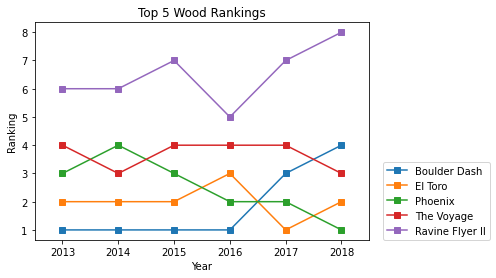

None
              Name      Rank
0     Boulder Dash  1.833333
1          El Toro  2.000000
2          Phoenix  2.500000
3       The Voyage  3.666667
4  Ravine Flyer II  6.500000


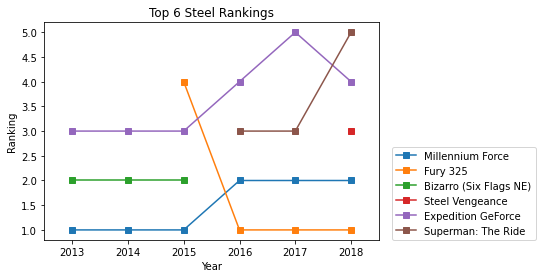

None
                     Name      Rank
0        Millennium Force  1.500000
1                Fury 325  1.750000
2  Bizarro (Six Flags NE)  2.000000
3         Steel Vengeance  3.000000
4      Expedition GeForce  3.666667
5      Superman: The Ride  3.666667


<Figure size 432x288 with 0 Axes>

In [4]:
# write function to plot top n rankings over time here:
# this function defines top n by their average rankings, allowing for comparison of newer coasters 
# also limits total coasters to n, but doesn't show the top n of each year
# create the ordered df's by average rank

ranked_steel = gtaw_steel.groupby('Name', as_index=False)['Rank'].mean()
ranked_steel.sort_values(by=['Rank'], inplace=True)
ranked_steel = ranked_steel.reset_index(drop=True)
ranked_wood = gtaw_wood.groupby('Name', as_index=False)['Rank'].mean()
ranked_wood.sort_values(by=['Rank'], inplace=True)
ranked_wood = ranked_wood.reset_index(drop=True)

def top_n(n, material): 
    #choose the correct df to use
    if material == 'wood':
        avg_rank = ranked_wood
        df = gtaw_wood
    elif material == 'steel':
        avg_rank = ranked_steel
        df = gtaw_steel
    else:
        return "Material must be 'wood' or 'steel'"
    #plot graph using #1 ranked for x parameters 
    ## this could be debugged further, but both #1's were around in 2013 so it isn't necessary
    ranks1 = df[df.Name == avg_rank.Name[0]]
    key = [avg_rank.Name[0]]
    xmin = ranks1['Year of Rank'].min()
    xmax = ranks1['Year of Rank'].max()
    plt.plot(ranks1['Year of Rank'], ranks1.Rank, marker='s')
    ax = plt.subplot()
    ax.set_xlim(xmin - 0.5, xmax + 0.5)
    #loop through the rest of the list up to input n
    for i in range(1,n):
        ranki = df[df.Name == avg_rank.Name[i]]
        key.append(avg_rank.Name[i])
        plt.plot(ranki['Year of Rank'], ranki.Rank, marker='s')
    #label
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.legend(key, loc=(1.04, 0))
    plt.title('Top {} {} Rankings'.format(str(n), material.capitalize()))
    plt.show()
    plt.clf()
#print(ranked_wood.head())
#print(gtaw_wood[gtaw_wood.Name == 'El Toro'])
print(top_n(5, 'wood'))
print(ranked_wood.head())
print(top_n(6, 'steel'))
print(ranked_steel.head(6))



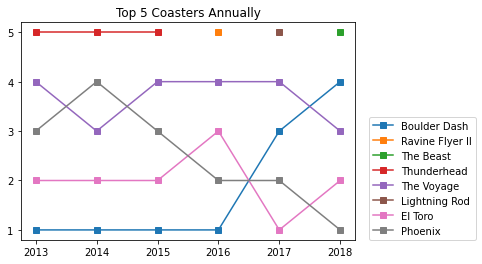

None


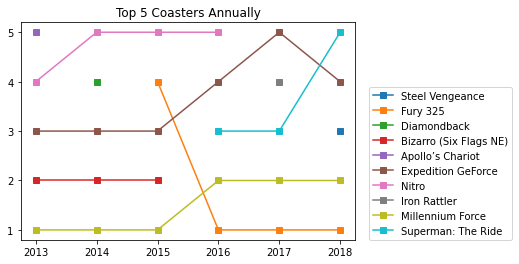

None


<Figure size 432x288 with 0 Axes>

In [5]:
# function to graph top n of each year in df:

def top_n_yearly(n, material):
    if material == 'steel':
        df = gtaw_steel
    elif material == 'wood':
        df = gtaw_wood
    else:
        return "Material must be 'steel' or 'wood'"
    ranked_df = df[df.Rank <= n]
    ax = plt.subplot()
    ax.set_yticks(range(1,n+1))
    key = []
    for ride in set(ranked_df.Name):
        ride_ranks = ranked_df[ranked_df.Name == ride]
        ax.plot(ride_ranks['Year of Rank'], ride_ranks.Rank, marker='s')
        key.append(ride)
    plt.legend(key, loc=(1.04, 0))
    plt.title('Top {} Coasters Annually'.format(n))
    plt.show()
    plt.clf()
    

print(top_n_yearly(5, 'wood'))
print(top_n_yearly(5, 'steel'))
    

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


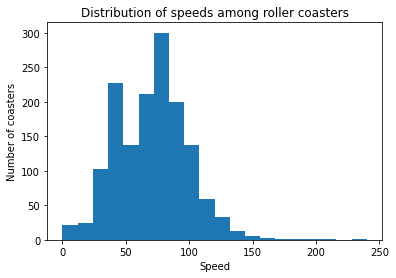

None


<Figure size 432x288 with 0 Axes>

In [6]:
# load roller coaster data here:

roller_coasters = pd.read_csv('roller_coasters.csv')
print(roller_coasters.head())

# roller coaster data histogram function:
def coaster_histogram(dataframe, column):
    if column in ['speed', 'length', 'num_inversions']:
        plt.hist(dataframe[column], bins=20)
        plt.xlabel(column.capitalize())
        plt.ylabel('Number of coasters')
        plt.title('Distribution of {}s among roller coasters'.format(column))
        plt.show()
        plt.clf()
    elif column == 'height':
        height = dataframe.height[dataframe.height <= 140]
        plt.hist(height, bins =20)
        plt.xlabel(column.capitalize())
        plt.ylabel('Number of coasters')
        plt.title('Distribution of heights among roller coasters')
        plt.show()
        plt.clf()
    else:
        return "Column must be in ['speed', 'height', 'length', 'num_inversions']"
print(coaster_histogram(roller_coasters, 'speed'))


    

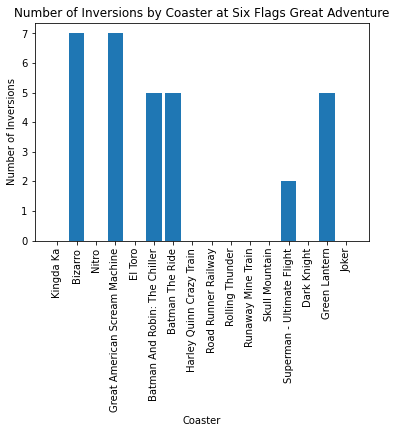

None


<Figure size 432x288 with 0 Axes>

In [7]:
# write function to plot inversions by coaster at a park here:

def inversions_by_park(dataframe, park):
    park_df = dataframe[dataframe.park == park]
    #park_df = park_df.sort_values('num_inversions', ascending=False)
    plt.bar(range(len(park_df.num_inversions)), park_df.num_inversions)
    ax = plt.subplot()
    ax.set_xticks(range(len(park_df.num_inversions)))
    ax.set_xticklabels(park_df.name, rotation=90)
    plt.xlabel('Coaster')
    plt.ylabel('Number of Inversions')
    plt.title('Number of Inversions by Coaster at {}'.format(park))
    plt.show()
    plt.clf()
print(inversions_by_park(roller_coasters, 'Six Flags Great Adventure'))

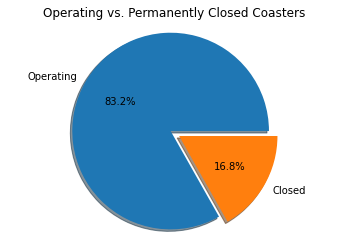

Number Operating: 2172
Number Closed: 439
None


<Figure size 432x288 with 0 Axes>

In [8]:
# write function to plot pie chart of operating status here:

def operating_status(dataframe):
    dataframe = roller_coasters
    plt.pie([len(dataframe[dataframe.status == 'status.operating']), len(dataframe[dataframe.status == 'status.closed.definitely'])], labels=['Operating', 'Closed'], autopct='%0.1f%%', explode=[0, 0.1], shadow=True)
    plt.title('Operating vs. Permanently Closed Coasters')
    plt.axis('equal')
    plt.show()
    plt.clf()
    print('Number Operating:', len(dataframe[dataframe.status == 'status.operating']))
    print('Number Closed:', len(dataframe[dataframe.status == 'status.closed.definitely']))
print(operating_status(roller_coasters))
    

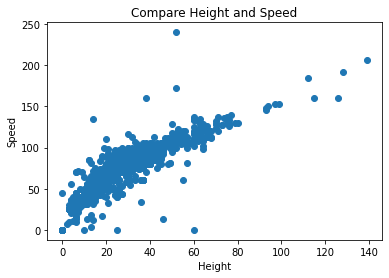

None


<Figure size 432x288 with 0 Axes>

In [9]:
# write function to create scatter plot of any two numeric columns here:

def correlate_any_two(df, col1, col2):
    if col1 or col2 == 'height':
        df = df.drop([683, 730])
    plt.scatter(df[col1], df[col2])
    plt.xlabel(col1.capitalize())
    plt.ylabel(col2.capitalize())
    plt.title('Compare {} and {}'.format(col1.capitalize(), col2.capitalize()))
    plt.show()
    plt.clf()
print(correlate_any_two(roller_coasters, 'height', 'speed'))

['Sit Down' 'Suspended' 'Inverted' 'Spinning' 'Water Coaster' 'Floorless'
 'Bobsleigh' 'Stand Up' 'Flying' '4th Dimension' 'Pipeline' 'Motorbike'
 'Wing' 'Alpine' 'na']


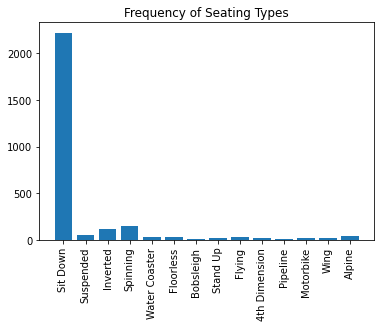

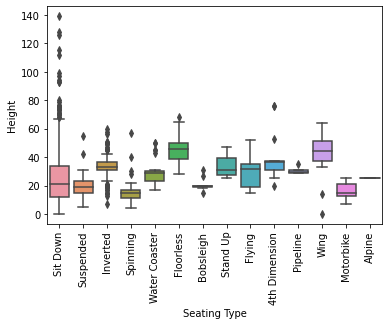

None


<Figure size 432x288 with 0 Axes>

In [10]:
# Explore seating type:

print(roller_coasters.seating_type.unique())

# Frequency of seating types:

df = roller_coasters[roller_coasters.seating_type != 'na']
seating = df.seating_type.unique()
counts = []
for style in seating:
    counts.append(len(df[df.seating_type == style]))
plt.bar(seating, counts)
ax = plt.subplot()
ax.set_xticks(range(len(seating)))
ax.set_xticklabels(seating, rotation=90)
plt.title('Frequency of Seating Types')
plt.show()
plt.clf()

#Compare Seating Style to numerical catergory
def seating_vs_metric(df, metric):
    df = df[df.seating_type != 'na']
    df = df[df.height < 140]
    sns.boxplot(data=df, x='seating_type', y=metric)
    ax = plt.subplot()
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.xlabel('Seating Type')
    plt.ylabel(metric.capitalize())
    plt.show()
    plt.clf()
print(seating_vs_metric(roller_coasters, 'height'))

In [17]:
# create list of prolific manufacturers
makers = roller_coasters.manufacturer.unique()
for maker in makers:
    df1 = roller_coasters[roller_coasters.manufacturer == maker]
    if df1.name.count() > 50:
        break
the_rest = roller_coasters[(roller_coasters.manufacturer != maker) & (roller_coasters.manufacturer != 'na')]
other_makers = the_rest.manufacturer.unique()
for maker in other_makers:
    df2 = roller_coasters[roller_coasters.manufacturer == maker]
    if df2.name.count() > 50:
        df1 = df1.append(df2, ignore_index=True)

# Materials crosstab shows most makers primarily use steel and olnly some makers make wood or hybrid
material_xtab = pd.crosstab(df1.manufacturer, df1.material_type)
material_xtab = material_xtab.drop('na', axis=1)
print(material_xtab)
chi2, pval, dof, expected = stats.chi2_contingency(material_xtab)
print('Material pval:', pval)

#Very clear and significant specialization by seating type
seating_xtab = pd.crosstab(df1.manufacturer, df1.seating_type)
print(seating_xtab)
chi2, pval, dof, expected = stats.chi2_contingency(seating_xtab)
print('Seating pval:', pval)




material_type  Hybrid  Steel  Wooden
manufacturer                        
Arrow               5     78       0
B&M                 0    121       0
Gerstlauer          0     73       0
Golden Horse        0     23       0
Intamin             0    126       8
Mack                0    122       0
Maurer              0     62       1
Pinfari             0    108       0
SBF                 0     48       0
Schwarzkopf         0     98       1
Vekoma              0    243       3
Zamperla            0    120       0
Zierer              0    126       0
Material pval: 4.904907172985463e-15
seating_type  4th Dimension  Bobsleigh  Floorless  Flying  Inverted  \
manufacturer                                                          
Arrow                     1          0          0       0         0   
B&M                       0          0         27      11        38   
Gerstlauer                0          0          0       0         0   
Golden Horse              0          0          0    

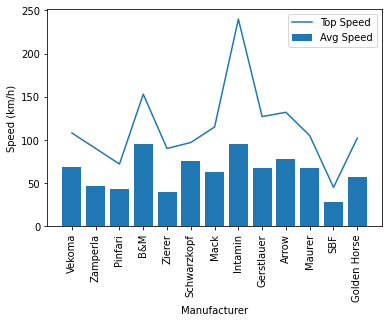

In [51]:
# Manufacturer and speed
top_makers = df1.manufacturer.unique()
speeds =[]
max_speeds = []
for i in range(len(top_makers)):
    single_maker = df1[df1.manufacturer == top_makers[i]]
    speeds.append(np.mean(single_maker.speed))
    max_speeds.append(single_maker.speed.max())
plt.bar(top_makers, speeds)
ax = plt.subplot()
ax.set_xticks(range(len(top_makers)))
ax.set_xticklabels(top_makers, rotation=90)
plt.xlabel('Manufacturer')
plt.ylabel('Speed (km/h)')
plt.plot(top_makers, max_speeds)
plt.legend(['Top Speed', 'Avg Speed'])

# Intamin and B&M seem to make the fastest coasters, Intamin focuses on sit-down, B&M on the other stuff

Text(0.5, 0, 'Top Speed')

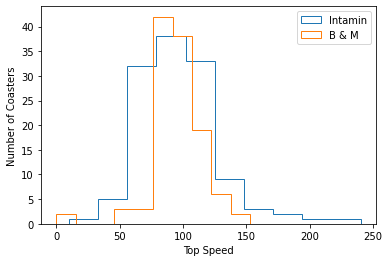

In [53]:
# Compare manufacturers with highest average speed
intamin = df1[df1.manufacturer == 'Intamin']
bm = df1[df1.manufacturer == 'B&M']
plt.hist(intamin.speed, histtype='step')
plt.hist(bm.speed, histtype='step')
plt.legend(['Intamin', 'B & M'])
plt.ylabel('Number of Coasters')
plt.xlabel('Top Speed')